# Import Data and split into train set and test set 

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
churn = pd.read_csv('..//datasets//train.csv')
pd.set_option("display.max_columns", None)
churn.shape
churn.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Usage_Band,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,high Dropped calls,No Usage,target,id
0,F,50.0,20/05/98,29.200000,2.0,Play 100,BS210,62.0,153.000000,185.0,438.600001,4.0,29.0,126.002615,2.045727,2.467742,2.370811,7.25,251.0,620.600001,2.472510,746.602616,0.003984,Med,20.600001,9.930712,2.045727,52.446773,112.386773,OK,0.150531,0.246536,0.706735,0.046729,0.203034,F,F,0,K262360
1,M,25.0,16/12/96,46.533333,1.0,CAT 100,ASAD90,146.0,718.800000,98.0,164.700000,4.0,37.2,251.580636,41.072379,4.923288,1.680612,9.30,248.0,920.700000,3.712500,1172.280636,0.002016,Med,320.700000,12.807103,41.072380,116.546571,221.546571,OK,0.188988,0.780710,0.178886,0.040404,0.273249,F,F,1,K170160
2,F,46.0,27/08/97,38.066667,1.0,CAT 50,WC95,160.0,322.800000,7.0,123.900000,0.0,0.0,91.584877,21.575073,2.017500,17.700000,0.00,167.0,446.700000,2.674850,538.284877,0.002994,MedLow,146.700000,12.226326,17.936021,45.411484,128.811484,OK,0.239300,0.722633,0.277367,0.000000,0.205025,F,F,0,K331610
3,F,59.0,13/07/98,27.400000,1.0,CAT 50,BS110,84.0,317.400001,57.0,161.699999,0.0,0.0,23.998036,20.950771,3.778571,2.836842,0.00,141.0,479.100000,3.397872,503.098036,0.003546,MedLow,179.100000,11.624922,20.820235,28.019646,111.419646,OK,0.221467,0.662492,0.337508,0.000000,0.050090,F,F,0,K332460
4,F,25.0,08/01/99,21.433333,1.0,Play 300,WC95,14.0,309.600000,326.0,637.800000,6.0,14.4,87.051515,0.000000,22.114286,1.956442,2.40,346.0,961.800000,2.779769,1048.851515,0.001445,Med,-838.200000,9.403618,0.000000,34.820606,112.760606,OK,0.107509,0.321896,0.663132,0.014972,0.090509,F,F,0,K394220


# Missing Values

#### Drop missing values

In [3]:
# Treating missing values on the dataset before splitting into training and test set 


print(churn.isna().sum())

# Find the five percent threshold
threshold = len(churn) * 0.05

# Create a filter
cols_to_drop = churn.columns[churn.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
churn.dropna(subset=cols_to_drop, inplace=True)

#print(churn.isna().sum())


Gender                    0
Age                       0
Connect_Date              0
L_O_S                     0
Dropped_Calls             0
tariff                    0
Handset                   0
Peak_calls_Sum            0
Peak_mins_Sum             0
OffPeak_calls_Sum         0
OffPeak_mins_Sum          0
Weekend_calls_Sum         0
Weekend_mins_Sum          0
International_mins_Sum    0
Nat_call_cost_Sum         0
AvePeak                   0
AveOffPeak                0
AveWeekend                0
National_calls            0
National mins             0
AveNational               0
All_calls_mins            0
Dropped_calls_ratio       4
Usage_Band                4
Mins_charge               0
call_cost_per_min         4
actual call cost          0
Total_call_cost           0
Total_Cost                0
Tariff_OK                 0
average cost min          0
Peak ratio                0
OffPeak ratio             0
Weekend ratio             0
Nat-InterNat Ratio        0
high Dropped calls  

In [5]:
# Split to training set and test set
X = churn.drop("target", axis=1)
y = churn["target"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [10]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [12]:
test_ID = X_test[["id", "average cost min"]]

## Transform Connect_Date into a date type column

In [15]:
# Transform Connect_Date into a datetime variable 

train["Connect_Date"] = pd.to_datetime(churn["Connect_Date"])

C:\Users\gcorl\AppData\Local\Temp\ipykernel_2488\3154815094.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train["Connect_Date"] = pd.to_datetime(churn["Connect_Date"])


# Investigate the categorical columns of the training set 

In [16]:
# Taking a look at the categorical variables 

train_categorical = train.select_dtypes(include=["object","int64"])
train_categorical.head()

,Gender,tariff,Handset,Usage_Band,Tariff_OK,high Dropped calls,No Usage,id,target
1115,F,CAT 100,WC95,Med,OK,F,F,K301840,0
4207,F,CAT 200,S50,High,OK,F,F,K116920,0
202,F,Play 300,BS210,Med,OK,F,F,K276340,0
2074,F,CAT 200,ASAD170,MedHigh,OK,F,F,K116850,0
4857,F,CAT 200,S50,MedHigh,OK,F,F,K115360,0


# Preprocessing of Categorical Columns 

- Drop "No Usage" feature as it has no variability (constant) and thus offers no predictive power to help discriminate churners from non-churners
- Binarize "high Dropped calls" feature, to 1 for True and 0 for False
- Binarize "Gender" feature, to 1 for Male and 0 for Female
- Regroup "Tariff_OK" into OK and Other AND Binarize into 1 for OK and 0 for Other
- Regroup "Handset", "tariff" and "Usage_Band" into fewer categories. Decide on how to regroup based on WOE values and Odds Ratio 


## Binarize "high Dropped calls" 

In [18]:
# Binarize the High Dropped calls feature 

# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the "Accessible" column
train["High_Dropped_calls"] = enc.fit_transform(train["high Dropped calls"])

# Compare the two columns
#print(train[["High_Dropped_calls", "high Dropped calls"]].head())

train.drop("high Dropped calls", axis=1, inplace=True)

## Drop "No Usage" variable

In [19]:
# The variables connect_month, connect_year, No Usage, Tariff_OK, and Gender are DROPPED from the training set

train.drop("No Usage", axis=1, inplace=True)

## Binarize "Gender" feature 

In [20]:
enc_2 = LabelEncoder()

# Apply the encoding to the "Accessible" column
train["Gender"] = enc_2.fit_transform(train["Gender"])

## Regroup "tariff_OK" AND Assign 1 for OK and 0 for Other

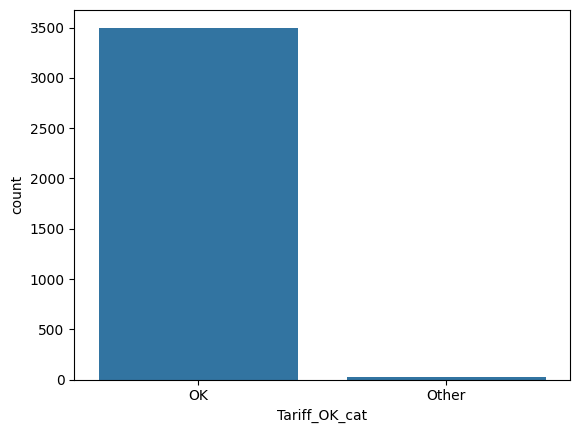

In [21]:
   # Create a list of categories
tariff_OK_categories = ["OK", "Other"]

# Create short_flights
okay = "OK"

other = "CAT|Play"
# Create long_flights
#handset_risky = "SOP10|ASAD90|CAS30|SOP20"

# Create conditions for values in flight_categories to be created
conditions = [
    (train["Tariff_OK"].str.contains(okay)),
    (train["Tariff_OK"].str.contains(other))
]

# Apply the conditions list to the flight_categories
train["Tariff_OK_cat"] = np.select(conditions, 
                                        tariff_OK_categories)

# Plot the counts of each category
sns.countplot(data=train, x="Tariff_OK_cat")
plt.show()

In [22]:
train.drop("Tariff_OK", axis=1, inplace=True)

In [23]:
train["Tariff_OK_cat"] = np.where(train["Tariff_OK_cat"]=="OK", 1,0)

## Regroup "Handset", "tariff" and "Usage_Band"

### Define Weights of Evidence Function

In [24]:
# WOE to group the tariff, Handset and Usage Band and replace the feature categorical values with the WOE values, thus turn the categorical variables into numerical

def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Bin Values': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & 
                    (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & 
                    (dataset[target] == 1)].count()[feature]
        }) 
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    dset = dset.sort_values(by='WoE')
    return dset, iv





### Calculate WOE value AND Odd Ratio for each category in the Handset feature

In [25]:
tuple_woe_handset = calculate_woe_iv(train, "Handset", "target")
handset_woe = tuple_woe_handset[0]
handset_iv = tuple_woe_handset[1]
print(handset_woe, handset_iv)

   Bin Values  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
10      SOP10   28     5   23    0.001662   0.044231 -3.281258  0.139678
6      ASAD90  201    44  157    0.014628   0.301923 -3.027258  0.869717
9       CAS30  118    28   90    0.009309   0.173077 -2.922807  0.478663
7       SOP20   35    10   25    0.003324   0.048077 -2.671493  0.119556
8       CAS60   79    79    0    0.026263   0.000000  0.000000  0.000000
1         S50  818   705  113    0.234375   0.217308  0.075608  0.001290
5       BS110  586   507   79    0.168551   0.151923  0.103861  0.001727
2       BS210  204   193   11    0.064162   0.021154  1.109593  0.047722
4         S80  527   515   12    0.171210   0.023077  2.004058  0.296868
3     ASAD170  454   448    6    0.148936   0.011538  2.557832  0.351440
0        WC95  478   474    4    0.157580   0.007692  3.019711  0.452617 2.7592788931146925


In [26]:
train_by_handset = pd.pivot_table(train, index="target", columns="Handset", aggfunc="size", fill_value=0)
odds = train_by_handset.iloc[0] / train_by_handset.iloc[1]
train_by_handset.loc["Odds"]= train_by_handset.iloc[0] / train_by_handset.iloc[1]
train_by_handset


Handset,ASAD170,ASAD90,BS110,BS210,CAS30,CAS60,S50,S80,SOP10,SOP20,WC95
target,,,,,,,,,,,
0,448.000000,44.000000,507.000000,193.000000,28.000000,79.0,705.000000,515.000000,5.000000,10.0,474.0
1,6.000000,157.000000,79.000000,11.000000,90.000000,0.0,113.000000,12.000000,23.000000,25.0,4.0
Odds,74.666667,0.280255,6.417722,17.545455,0.311111,inf,6.238938,42.916667,0.217391,0.4,118.5


##### Regrouping: 
- SOP10, ASAD90, CAS30 and SOP20 can be summarized by a single category corresponding to "risky" categories
- S50, BS110 summarized to a new "neutral" category
- BS210, S80, ASAD170, WC95, CAS60 to a new "safe" category as the percentage of non-churners is higher than churners in these categories

#### Create the new categories, calculate their WOE values and create a new column for Handset, which contains WOE values 

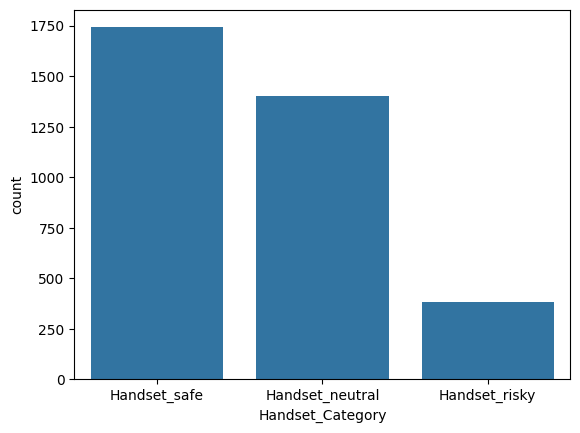

In [27]:
   # Create a list of categories
handset_categories = ["Handset_safe", "Handset_neutral", "Handset_risky"]

# Create short_flights
handset_safe = "BS210|S80|ASAD170|WC95|CAS60"

# Create medium_flights
handset_neutral = "S50|BS110"

# Create long_flights
handset_risky = "SOP10|ASAD90|CAS30|SOP20"

# Create conditions for values in flight_categories to be created
conditions = [
    (train["Handset"].str.contains(handset_safe)),
    (train["Handset"].str.contains(handset_neutral)),
    (train["Handset"].str.contains(handset_risky))
]

# Apply the conditions list to the flight_categories
train["Handset_Category"] = np.select(conditions, 
                                        handset_categories)

# Plot the counts of each category
sns.countplot(data=train, x="Handset_Category")
plt.show()

In [28]:
tuple_woe_handset_cat = calculate_woe_iv(train, "Handset_Category", "target")
handset_cat_woe = tuple_woe_handset_cat[0]
handset_cat_iv = tuple_woe_handset_cat[1]
print(handset_cat_woe, handset_cat_iv)

        Bin Values   All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
2    Handset_risky   382    87  295    0.028923   0.567308 -2.976269  1.602378
1  Handset_neutral  1404  1212  192    0.402926   0.369231  0.087330  0.002943
0     Handset_safe  1742  1709   33    0.568152   0.063462  2.191954  1.106258 2.71157818562674


In [29]:
handset_to_woe_dict = dict(zip(handset_cat_woe['Bin Values'], handset_cat_woe['WoE']))
train['woe_handset_cat'] = train['Handset_Category'].map(handset_to_woe_dict)

### Calculate WOE value AND Odd Ratio for each category in the tariff feature

In [30]:
tuple_woe_tariff = calculate_woe_iv(train, "tariff", "target")
tariff_woe = tuple_woe_tariff[0]
tariff_iv = tuple_woe_tariff[1]
print(tariff_woe, tariff_iv)

  Bin Values   All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
3   Play 100   558   439  119    0.145944   0.228846 -0.449826  0.037291
4     CAT 50   234   195   39    0.064827   0.075000 -0.145764  0.001483
1    CAT 200  1541  1318  223    0.438165   0.428846  0.021497  0.000200
0    CAT 100   726   630   96    0.209441   0.184615  0.126170  0.003132
2   Play 300   469   426   43    0.141622   0.082692  0.538037  0.031707 0.07381349978175396


In [31]:
train_by_tariff = pd.pivot_table(train, index="target", columns="tariff", aggfunc="size", fill_value=0)
odds = train_by_tariff.iloc[0] / train_by_tariff.iloc[1]
train_by_tariff.loc["Odds"]= train_by_tariff.iloc[0] / train_by_tariff.iloc[1]
train_by_tariff

tariff,CAT 100,CAT 200,CAT 50,Play 100,Play 300
target,,,,,
0,630.0000,1318.000000,195.0,439.000000,426.000000
1,96.0000,223.000000,39.0,119.000000,43.000000
Odds,6.5625,5.910314,5.0,3.689076,9.906977


##### Regrouping: 
- Play 100 contains the most risk so it will remain a category on it's own
- CAT50, CAT200 and CAT100 do not have much IV on their own and WOE do not offer much information, so they will be summarized to a CAT category
- Play 300 has significant IV value, and churners dominate this category, it will remain a category on its own 

#### Create the new categories, calculate their WOE values and create a new column for tariff, which contains WOE values 

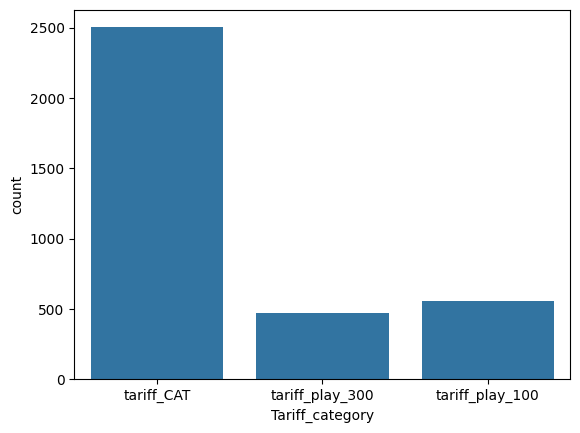

In [32]:
   # Create a list of categories
tariff_categories = ["tariff_play_300", "tariff_CAT", "tariff_play_100"]

# Create short_flights
tariff_less_risky = "Play 300"

tariff_neutral = "CAT 200|CAT 50|CAT 100"

# Create medium_flights
tariff_risky = "Play 100"

# Create long_flights
#handset_risky = "SOP10|ASAD90|CAS30|SOP20"

# Create conditions for values in flight_categories to be created
conditions = [
    (train["tariff"].str.contains(tariff_less_risky)),
    (train["tariff"].str.contains(tariff_neutral)),
    (train["tariff"].str.contains(tariff_risky))
]

# Apply the conditions list to the flight_categories
train["Tariff_category"] = np.select(conditions, 
                                        tariff_categories)

# Plot the counts of each category
sns.countplot(data=train, x="Tariff_category")
plt.show()

In [33]:
tuple_woe_tariff_cat = calculate_woe_iv(train, "Tariff_category", "target")
tariff_cat_woe = tuple_woe_tariff_cat[0]
tariff_cat_iv = tuple_woe_tariff_cat[1]
print(tariff_cat_woe, tariff_cat_iv)

        Bin Values   All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
2  tariff_play_100   558   439  119    0.145944   0.228846 -0.449826  0.037291
0       tariff_CAT  2501  2143  358    0.712434   0.688462  0.034227  0.000820
1  tariff_play_300   469   426   43    0.141622   0.082692  0.538037  0.031707 0.06981852441452721


In [34]:
tariff_to_woe_dict = dict(zip(tariff_cat_woe['Bin Values'], tariff_cat_woe['WoE']))
train['woe_tariff_cat'] = train['Tariff_category'].map(tariff_to_woe_dict)

### Calculate WOE value AND Odd Ratio for each category in the usage_band feature

In [35]:
tuple_woe_usage_band = calculate_woe_iv(train, "Usage_Band", "target")
usage_band_woe = tuple_woe_usage_band[0]
usage_band_iv = tuple_woe_usage_band[1]
print(usage_band_woe, usage_band_iv)

  Bin Values   All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
4        Low    62    44   18    0.014628   0.034615 -0.861384  0.017217
3     MedLow   391   281  110    0.093418   0.211538 -0.817328  0.096543
1       High   255   213   42    0.070811   0.080769 -0.131579  0.001310
2    MedHigh   885   762  123    0.253324   0.236538  0.068560  0.001151
0        Med  1935  1708  227    0.567819   0.436538  0.262926  0.034517 0.15073887994003912


In [36]:
train_by_usage = pd.pivot_table(train, index="target", columns="Usage_Band", aggfunc="size", fill_value=0)
odds = train_by_usage.iloc[0] / train_by_usage.iloc[1]
train_by_usage.loc["Odds"]= train_by_usage.iloc[0] / train_by_usage.iloc[1]
train_by_usage

Usage_Band,High,Low,Med,MedHigh,MedLow
target,,,,,
0,213.000000,44.000000,1708.000000,762.000000,281.000000
1,42.000000,18.000000,227.000000,123.000000,110.000000
Odds,5.071429,2.444444,7.524229,6.195122,2.554545


##### Regrouping: 
- Low and MedLow have very negative WOE values and especially MedLow offers high IV. Grouped together into a Low category (453 total observations)
- Med has has a positive WOE value and good IV value, it will remain a category on its own. (1935 obs)
- High and MedHigh do not offer much IV, as it is difficult to differentiate between churners and non-churners. Form a new High category together (1140)

#### Create the new categories, calculate their WOE values and create a new column for usage_band, which contains WOE values 

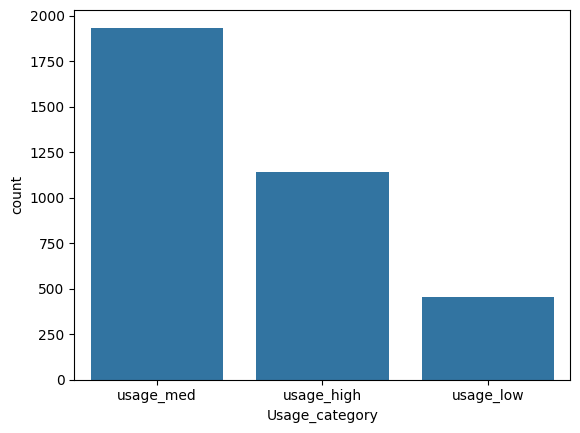

In [37]:
   # Create a list of categories
usage_categories = ["usage_low", "usage_med", "usage_high"]

# Create short_flights
usage_low = "Low"

usage_med = r"\bMed\b"

usage_high = "High"


# Create long_flights
#handset_risky = "SOP10|ASAD90|CAS30|SOP20"

# Create conditions for values in flight_categories to be created
conditions = [
    (train["Usage_Band"].str.contains(usage_low)),
    (train["Usage_Band"].str.contains(usage_med)),
    (train["Usage_Band"].str.contains(usage_high))
]

# Apply the conditions list to the flight_categories
train["Usage_category"] = np.select(conditions, 
                                        usage_categories)

# Plot the counts of each category
sns.countplot(data=train, x="Usage_category")
plt.show()

In [38]:
tuple_woe_usage_cat = calculate_woe_iv(train, "Usage_category", "target")
usage_cat_woe = tuple_woe_usage_cat[0]
usage_cat_iv = tuple_woe_usage_cat[1]
print(usage_cat_woe, usage_cat_iv)

   Bin Values   All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
2   usage_low   453   325  128    0.108045   0.246154 -0.823407  0.113720
1  usage_high  1140   975  165    0.324136   0.317308  0.021290  0.000145
0   usage_med  1935  1708  227    0.567819   0.436538  0.262926  0.034517 0.14838214657508908


In [39]:
usage_to_woe_dict = dict(zip(usage_cat_woe['Bin Values'], usage_cat_woe['WoE']))
train['woe_usage_cat'] = train['Usage_category'].map(usage_to_woe_dict)

### Drop the old variables for Handset, tariff and Usage_Band and use the new columns for those variables that contain the WOE values

In [40]:
train.drop(["tariff","Handset","Usage_Band","Handset_Category","Tariff_category","Usage_category"],axis=1,inplace=True)

# Outliers
- Checking for Outliers in the numeric columns except from the woe columns, the dummy variables and target

In [41]:
# Function to detect outliers 
filtered_columns = train.select_dtypes(include=["int","float"]).columns[~train.select_dtypes(include=["int","float"]).columns.str.contains("^woe")]

filtered_columns = filtered_columns.drop(['target','High_Dropped_calls','Tariff_OK_cat','Gender'])
filtered_columns

Index(['Age', 'L_O_S', 'Dropped_Calls', 'Peak_calls_Sum', 'Peak_mins_Sum',
       'OffPeak_calls_Sum', 'OffPeak_mins_Sum', 'Weekend_calls_Sum',
       'Weekend_mins_Sum', 'International_mins_Sum', 'Nat_call_cost_Sum',
       'AvePeak', 'AveOffPeak', 'AveWeekend', 'National_calls',
       'National mins', 'AveNational', 'All_calls_mins', 'Dropped_calls_ratio',
       'Mins_charge', 'call_cost_per_min', 'actual call cost',
       'Total_call_cost', 'Total_Cost', 'average cost min', 'Peak ratio',
       'OffPeak ratio', 'Weekend ratio', 'Nat-InterNat Ratio'],
      dtype='object')

## Define outlier detection function 

In [42]:
# For each column calculate median and iqr and use them to calculate robust score for z value. 
# Return  number of outliers per feature, which are only values that have z > 3 

def robust_outlier_detection(dataset, columns):
    outliers = {}
    for feature_name in columns:
       median = np.median(dataset[feature_name])
       q75, q25 = np.percentile(dataset[feature_name], [75 ,25])
       iqr = q75-q25
       robust_z = (dataset[feature_name] - median) / iqr
       mask = abs(robust_z) > 3 
       outliers[feature_name] = sum(mask)
    return outliers

In [43]:
outlier_dict = robust_outlier_detection(train, filtered_columns)
outlier_dict

{'Age': 0,
 'L_O_S': 0,
 'Dropped_Calls': 470,
 'Peak_calls_Sum': 44,
 'Peak_mins_Sum': 1,
 'OffPeak_calls_Sum': 14,
 'OffPeak_mins_Sum': 0,
 'Weekend_calls_Sum': 33,
 'Weekend_mins_Sum': 4,
 'International_mins_Sum': 29,
 'Nat_call_cost_Sum': 120,
 'AvePeak': 323,
 'AveOffPeak': 354,
 'AveWeekend': 323,
 'National_calls': 34,
 'National mins': 2,
 'AveNational': 188,
 'All_calls_mins': 5,
 'Dropped_calls_ratio': 234,
 'Mins_charge': 77,
 'call_cost_per_min': 2,
 'actual call cost': 125,
 'Total_call_cost': 61,
 'Total_Cost': 15,
 'average cost min': 129,
 'Peak ratio': 0,
 'OffPeak ratio': 0,
 'Weekend ratio': 93,
 'Nat-InterNat Ratio': 3}

## Plot number of outliers per feature 

C:\Users\gcorl\AppData\Local\Temp\ipykernel_2488\2410845615.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keys, y=values, palette='viridis')


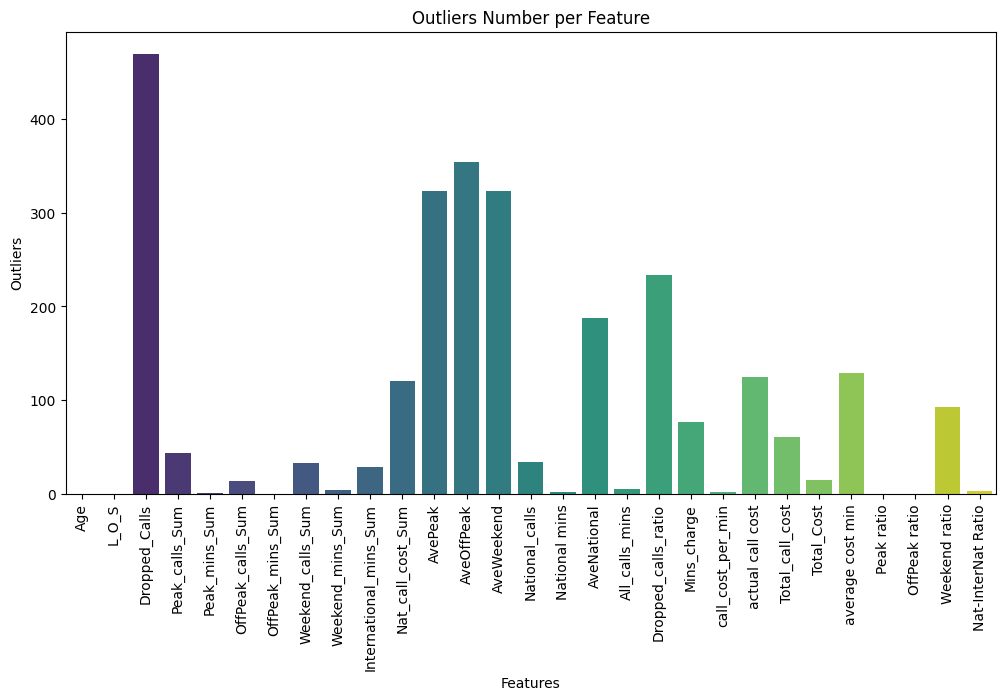

In [44]:
keys = list(outlier_dict.keys())
values = list(outlier_dict.values())

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=keys, y=values, palette='viridis')
plt.xlabel('Features')
plt.ylabel('Outliers')
plt.title('Outliers Number per Feature')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

## Define outlier truncuation function : Replace each outlier with values for which z=3

### Remove outliers from the following features: ['AvePeak', 'AveOffPeak', 'AveWeekend', 'AveNational', 'average cost min']

In [45]:
#filtered_columns = train.select_dtypes(include=["int","float"]).columns[~train.select_dtypes(include=["int","float"]).columns.str.contains("^woe")]


def truncate_outliers(dataset,columns):
    for feature_name in columns:
       median = np.median(dataset[feature_name])
       q75, q25 = np.percentile(dataset[feature_name], [75 ,25])
       iqr = q75-q25
       k = 3*iqr + median
       dataset[feature_name] = np.where((abs((dataset[feature_name]  - median) / iqr)) > 3, k, dataset[feature_name] )

In [46]:
filtered_columns_trunct = list(filtered_columns)
filtered_columns_trunct = filtered_columns_trunct[11:14]  + [filtered_columns_trunct[16]] + [filtered_columns_trunct[24]] 

In [48]:
truncate_outliers(train, filtered_columns_trunct)

In [49]:
outlier_dict = robust_outlier_detection(train,filtered_columns)
outlier_dict

{'Age': 0,
 'L_O_S': 0,
 'Dropped_Calls': 470,
 'Peak_calls_Sum': 44,
 'Peak_mins_Sum': 1,
 'OffPeak_calls_Sum': 14,
 'OffPeak_mins_Sum': 0,
 'Weekend_calls_Sum': 33,
 'Weekend_mins_Sum': 4,
 'International_mins_Sum': 29,
 'Nat_call_cost_Sum': 120,
 'AvePeak': 0,
 'AveOffPeak': 0,
 'AveWeekend': 0,
 'National_calls': 34,
 'National mins': 2,
 'AveNational': 0,
 'All_calls_mins': 5,
 'Dropped_calls_ratio': 234,
 'Mins_charge': 77,
 'call_cost_per_min': 2,
 'actual call cost': 125,
 'Total_call_cost': 61,
 'Total_Cost': 15,
 'average cost min': 0,
 'Peak ratio': 0,
 'OffPeak ratio': 0,
 'Weekend ratio': 93,
 'Nat-InterNat Ratio': 3}

### Plot the features without the Outliers 

C:\Users\gcorl\AppData\Local\Temp\ipykernel_2488\2410845615.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keys, y=values, palette='viridis')


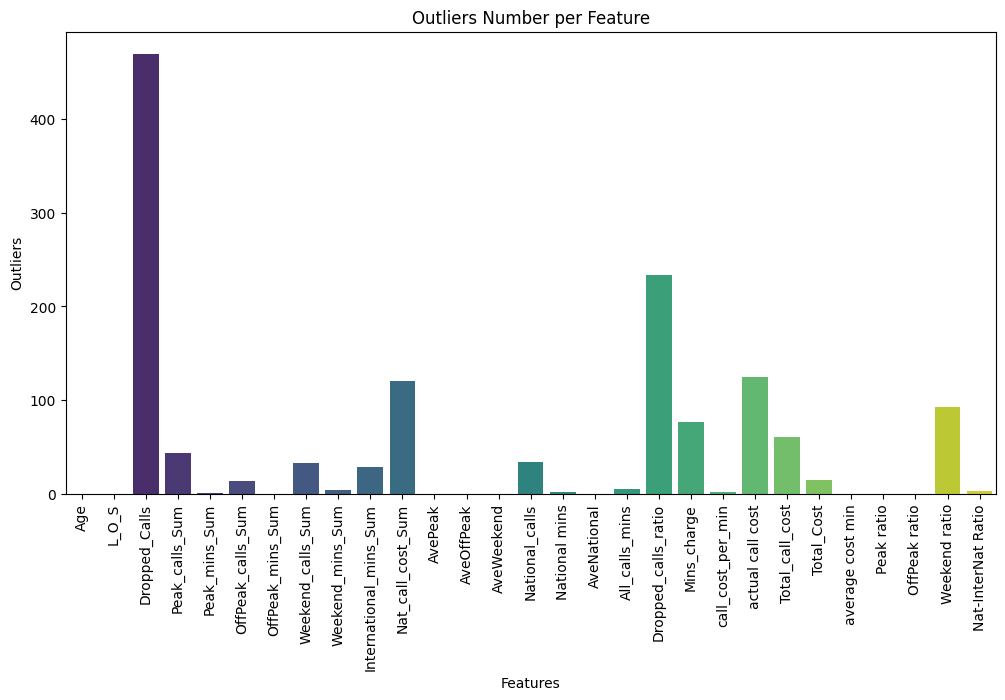

In [50]:
keys = list(outlier_dict.keys())
values = list(outlier_dict.values())

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=keys, y=values, palette='viridis')
plt.xlabel('Features')
plt.ylabel('Outliers')
plt.title('Outliers Number per Feature')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Multi-Class Decision Tree for "Dropped_Calls" feature to look for Binning opportunities

In [52]:
# Binning of Dropped_Calls using Multiway Decision Tree 

X_Dropped_Calls = train["Dropped_Calls"].values.reshape(-1,1)
y_target = train["target"]

dt_dropped_calls = DecisionTreeClassifier(max_depth=10, random_state=34, min_samples_split=0.5, splitter="best")
dt_dropped_calls.fit(X_Dropped_Calls,y_target)


DecisionTreeClassifier(max_depth=10, min_samples_split=0.5, random_state=34)

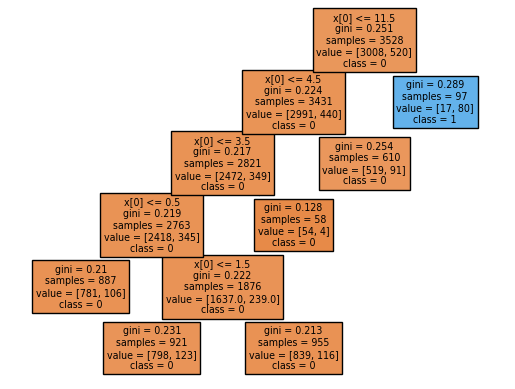

In [53]:
tree.plot_tree(dt_dropped_calls, filled=True, class_names=["0","1"])
plt.show()
# 0-2, 3-11, 11-

## Bin the Dropped_Calls feature into two Bins for below 11 and above 11 and binarize the new feature into 1 for dropped calls above 11 and 0 for below 11

In [54]:
# Create salary labels
drop_calls_labels = ["0-11", "12-15"]

# Create the salary ranges list
drop_calls_ranges = [-0.1, 12, train["Dropped_Calls"].max()]

# Create salary_level
train["binned_drop_calls"] = pd.cut(train["Dropped_Calls"],
                                  bins=drop_calls_ranges,
                                  labels=drop_calls_labels)

In [55]:
train["binned_drop_calls"].value_counts()

binned_drop_calls
0-11     3461
12-15      67
Name: count, dtype: int64

In [56]:
calculate_woe_iv(train, "binned_drop_calls", "target")

(  Bin Values   All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
 1      12-15    67     9   58    0.002992   0.111538 -3.618420  0.392767
 0       0-11  3461  2999  462    0.997008   0.888462  0.115267  0.012512,
 0.40527851115068825)

In [58]:
train["above_11_dropped_calls"] = np.where(train["binned_drop_calls"]=="12-15",1,0)
train["above_11_dropped_calls"].value_counts()

above_11_dropped_calls
0    3461
1      67
Name: count, dtype: int64

In [59]:
train.drop("binned_drop_calls",axis=1,inplace=True)

## Multi-Class Decision Tree for "Age" feature to look for Binning opportunities

In [61]:
# Binning of Age using Multiway Decision Tree 

X_Age = train["Age"].values.reshape(-1,1)
y_target = train["target"]

dt_age = DecisionTreeClassifier(max_depth=10, random_state=34, min_samples_split=0.5, splitter="best")
dt_age.fit(X_Age,y_target)

DecisionTreeClassifier(max_depth=10, min_samples_split=0.5, random_state=34)

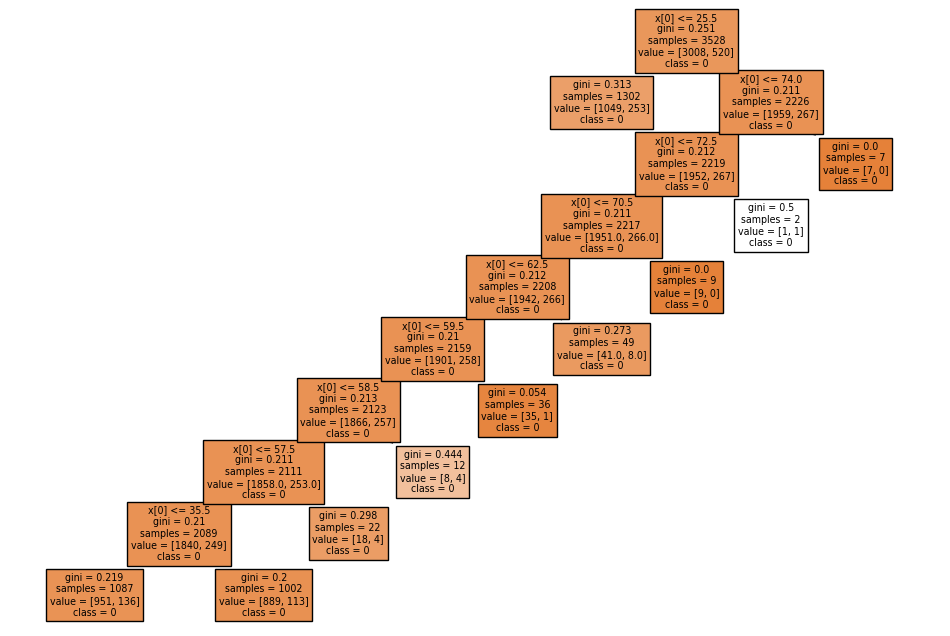

In [62]:
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_age, filled=True, class_names=["0","1"])
plt.show()

In [63]:
# Create salary labels
age_labels = ["12-25","26-80"]

# Create the salary ranges list
age_ranges = [0, 26, train["Age"].max()]

# Create salary_level
train["binned_age"] = pd.cut(train["Age"],
                                  bins=age_ranges,
                                  labels=age_labels)

In [64]:
calculate_woe_iv(train,"binned_age","target")

(  Bin Values   All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
 0      12-25  1441  1172  269    0.389628   0.517308 -0.283446  0.036190
 1      26-80  2087  1836  251    0.610372   0.482692  0.234690  0.029965,
 0.06615562674071114)

In [65]:
tuple_woe_age = calculate_woe_iv(train,"binned_age","target")
age_woe = tuple_woe_age[0]
age_iv = tuple_woe_age[1]
print(age_woe, age_iv)

  Bin Values   All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
0      12-25  1441  1172  269    0.389628   0.517308 -0.283446  0.036190
1      26-80  2087  1836  251    0.610372   0.482692  0.234690  0.029965 0.06615562674071114


In [66]:
age_to_woe_dict = dict(zip(age_woe['Bin Values'], age_woe['WoE']))
train['woe_age'] = train['binned_age'].map(age_to_woe_dict)

In [67]:
train.drop("binned_age",axis=1,inplace=True)

# Identifying Feature Importance. Methods used:
- Decision Trees: Information Gain Per Feature
- Regularization
- Stepwise Selection based on AUC and profit-metric
- t-SNE

## Decision Tree on the train set without id and without Connect_Date 
- Plot each feature based on IV importance 

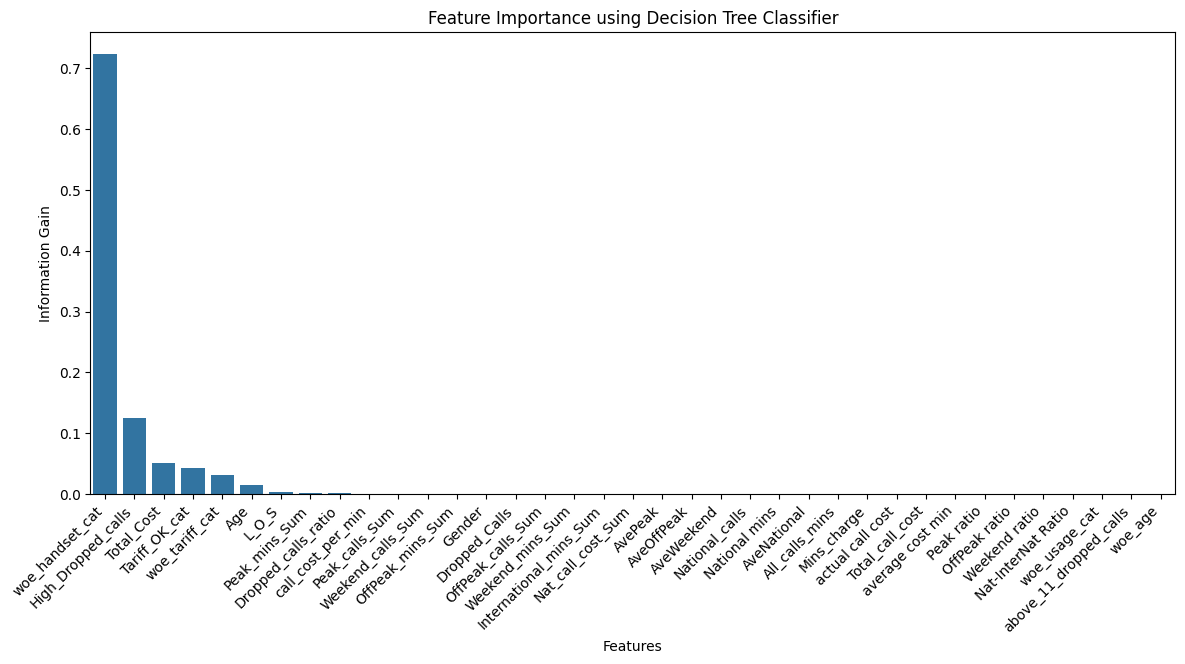

In [68]:
decision_X_train = train.drop(["target","id","Connect_Date"],axis=1)
decision_y_train = train["target"]
#decision_X_train.drop("Connect_Date",axis=1,inplace=True)

# Fit decision tree on the training set for feature importance 

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt_feat_imp = DecisionTreeClassifier(max_depth=None, random_state=2424,min_samples_split=0.2)

# Fit dt to the training set
dt_feat_imp.fit(decision_X_train, decision_y_train)

feature_names = decision_X_train.columns

importance = list(dt_feat_imp.feature_importances_)
column_names = list(decision_X_train.columns)
feature_dict = dict(zip(column_names, importance))
sorted_dict = dict(sorted(feature_dict.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(14, 6))


sns.barplot(x=list(sorted_dict.keys()), y=list(sorted_dict.values()))

# Set plot labels
plt.xlabel('Features')
plt.ylabel('Information Gain')
plt.title('Feature Importance using Decision Tree Classifier')

# Increase the size of the graph


# Rotate feature names on the x-axis
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

# Prepare test set based on the changes on the training set 
- Remove outliers based on the median and iqr used to delete outliers in the training set
- Add the training set calculated woe columns into the test set
- Drop the connect_date column 

## Drop outliers from the test set

In [69]:
def robust_outlier_detection_test(dataset, columns):
    outliers = {}
    for feature_name in columns:
       median = np.median(X_train[feature_name])
       q75, q25 = np.percentile(X_train[feature_name], [75 ,25])
       iqr = q75-q25
       robust_z = (dataset[feature_name] - median) / iqr
       mask = abs(robust_z) > 3 
       outliers[feature_name] = sum(mask)
    return outliers

In [70]:
filtered_columns_test = test.select_dtypes(include=["int","float"]).columns

filtered_columns_test = filtered_columns_test.drop('target')
filtered_columns_test


Index(['Age', 'L_O_S', 'Dropped_Calls', 'Peak_calls_Sum', 'Peak_mins_Sum',
       'OffPeak_calls_Sum', 'OffPeak_mins_Sum', 'Weekend_calls_Sum',
       'Weekend_mins_Sum', 'International_mins_Sum', 'Nat_call_cost_Sum',
       'AvePeak', 'AveOffPeak', 'AveWeekend', 'National_calls',
       'National mins', 'AveNational', 'All_calls_mins', 'Dropped_calls_ratio',
       'Mins_charge', 'call_cost_per_min', 'actual call cost',
       'Total_call_cost', 'Total_Cost', 'average cost min', 'Peak ratio',
       'OffPeak ratio', 'Weekend ratio', 'Nat-InterNat Ratio'],
      dtype='object')

In [71]:
outlier_dict_test = robust_outlier_detection_test(test,filtered_columns_test)
outlier_dict_test

{'Age': 0,
 'L_O_S': 0,
 'Dropped_Calls': 214,
 'Peak_calls_Sum': 19,
 'Peak_mins_Sum': 0,
 'OffPeak_calls_Sum': 7,
 'OffPeak_mins_Sum': 0,
 'Weekend_calls_Sum': 15,
 'Weekend_mins_Sum': 0,
 'International_mins_Sum': 11,
 'Nat_call_cost_Sum': 49,
 'AvePeak': 141,
 'AveOffPeak': 151,
 'AveWeekend': 141,
 'National_calls': 11,
 'National mins': 1,
 'AveNational': 75,
 'All_calls_mins': 4,
 'Dropped_calls_ratio': 106,
 'Mins_charge': 27,
 'call_cost_per_min': 1,
 'actual call cost': 53,
 'Total_call_cost': 27,
 'Total_Cost': 6,
 'average cost min': 42,
 'Peak ratio': 0,
 'OffPeak ratio': 0,
 'Weekend ratio': 38,
 'Nat-InterNat Ratio': 2}

In [73]:
def truncate_outliers_test(dataset,columns):
    for feature_name in columns:
       median = np.median(X_train[feature_name])
       q75, q25 = np.percentile(X_train[feature_name], [75 ,25])
       iqr = q75-q25
       k = 3*iqr + median
       dataset[feature_name] = np.where((abs((dataset[feature_name]  - median) / iqr)) > 3, k, dataset[feature_name] )

In [74]:
filtered_columns_trunct_test = list(filtered_columns_test)
#filtered_columns_trunct_test
filtered_columns_trunct_test = filtered_columns_trunct_test[11:14]  + [filtered_columns_trunct_test[16]] + [filtered_columns_trunct_test[24]] 


In [75]:
filtered_columns_trunct_test

['AvePeak', 'AveOffPeak', 'AveWeekend', 'AveNational', 'average cost min']

In [76]:
truncate_outliers_test(test,filtered_columns_trunct_test)

In [77]:
outlier_dict_test_2 = robust_outlier_detection_test(test, filtered_columns_test)
outlier_dict_test_2

{'Age': 0,
 'L_O_S': 0,
 'Dropped_Calls': 214,
 'Peak_calls_Sum': 19,
 'Peak_mins_Sum': 0,
 'OffPeak_calls_Sum': 7,
 'OffPeak_mins_Sum': 0,
 'Weekend_calls_Sum': 15,
 'Weekend_mins_Sum': 0,
 'International_mins_Sum': 11,
 'Nat_call_cost_Sum': 49,
 'AvePeak': 0,
 'AveOffPeak': 0,
 'AveWeekend': 0,
 'National_calls': 11,
 'National mins': 1,
 'AveNational': 0,
 'All_calls_mins': 4,
 'Dropped_calls_ratio': 106,
 'Mins_charge': 27,
 'call_cost_per_min': 1,
 'actual call cost': 53,
 'Total_call_cost': 27,
 'Total_Cost': 6,
 'average cost min': 0,
 'Peak ratio': 0,
 'OffPeak ratio': 0,
 'Weekend ratio': 38,
 'Nat-InterNat Ratio': 2}

C:\Users\gcorl\AppData\Local\Temp\ipykernel_2488\284310282.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keys, y=values, palette='viridis')


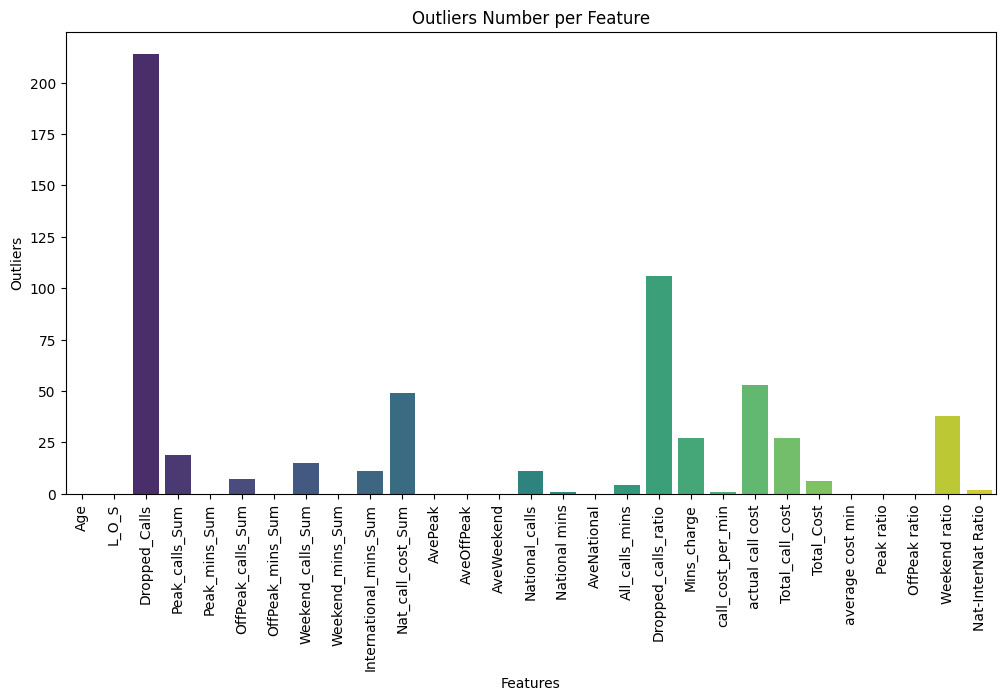

In [78]:
keys = list(outlier_dict_test_2.keys())
values = list(outlier_dict_test_2.values())

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=keys, y=values, palette='viridis')
plt.xlabel('Features')
plt.ylabel('Outliers')
plt.title('Outliers Number per Feature')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

## Add woe values from the training set to the test set and create the dummy variables

In [79]:
   # Create a list of categories
handset_categories = ["Handset_safe", "Handset_neutral", "Handset_risky"]

# Create short_flights
handset_safe = "BS210|S80|ASAD170|WC95|CAS60"

# Create medium_flights
handset_neutral = "S50|BS110"

# Create long_flights
handset_risky = "SOP10|ASAD90|CAS30|SOP20"

# Create conditions for values in flight_categories to be created
conditions = [
    (test["Handset"].str.contains(handset_safe)),
    (test["Handset"].str.contains(handset_neutral)),
    (test["Handset"].str.contains(handset_risky))
]

# Apply the conditions list to the flight_categories
test["Handset_Category"] = np.select(conditions, 
                                        handset_categories)


handset_to_woe_dict = dict(zip(handset_cat_woe['Bin Values'], handset_cat_woe['WoE']))
test['woe_handset_cat'] = test['Handset_Category'].map(handset_to_woe_dict)



In [80]:
   # Create a list of categories
tariff_categories = ["tariff_play_300", "tariff_CAT", "tariff_play_100"]

# Create short_flights
tariff_less_risky = "Play 300"

tariff_neutral = "CAT 200|CAT 50|CAT 100"

# Create medium_flights
tariff_risky = "Play 100"

# Create long_flights
#handset_risky = "SOP10|ASAD90|CAS30|SOP20"

# Create conditions for values in flight_categories to be created
conditions = [
    (test["tariff"].str.contains(tariff_less_risky)),
    (test["tariff"].str.contains(tariff_neutral)),
    (test["tariff"].str.contains(tariff_risky))
]

# Apply the conditions list to the flight_categories
test["Tariff_category"] = np.select(conditions, 
                                        tariff_categories)

tariff_to_woe_dict = dict(zip(tariff_cat_woe['Bin Values'], tariff_cat_woe['WoE']))
test['woe_tariff_cat'] = test['Tariff_category'].map(tariff_to_woe_dict)

In [81]:
   # Create a list of categories
usage_categories = ["usage_low", "usage_med", "usage_high"]

# Create short_flights
usage_low = "Low"

usage_med = r"\bMed\b"

usage_high = "High"

# Create long_flights
#handset_risky = "SOP10|ASAD90|CAS30|SOP20"

# Create conditions for values in flight_categories to be created
conditions = [
    (test["Usage_Band"].str.contains(usage_low)),
    (test["Usage_Band"].str.contains(usage_med)),
    (test["Usage_Band"].str.contains(usage_high))
]

# Apply the conditions list to the flight_categories
test["Usage_category"] = np.select(conditions, 
                                        usage_categories)

usage_to_woe_dict = dict(zip(usage_cat_woe['Bin Values'], usage_cat_woe['WoE']))
test['woe_usage_cat'] = test['Usage_category'].map(usage_to_woe_dict)

In [82]:
# Binarize the High Dropped calls feature 

from sklearn.preprocessing import LabelEncoder
# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the "Accessible" column
test["High_Dropped_calls"] = enc.fit_transform(test["high Dropped calls"])

# Compare the two columns
#print(train[["High_Dropped_calls", "high Dropped calls"]].head())

test.drop("high Dropped calls", axis=1, inplace=True)

In [83]:
# The variables connect_month, connect_year, No Usage, Tariff_OK, and Gender are DROPPED from the training set

test.drop("No Usage", axis=1, inplace=True)

In [84]:
enc_2 = LabelEncoder()

# Apply the encoding to the "Accessible" column
test["Gender"] = enc_2.fit_transform(test["Gender"])

In [85]:
   # Create a list of categories
tariff_OK_categories = ["OK", "Other"]

# Create short_flights
okay = "OK"

other = "CAT|Play"
# Create long_flights
#handset_risky = "SOP10|ASAD90|CAS30|SOP20"

# Create conditions for values in flight_categories to be created
conditions = [
    (test["Tariff_OK"].str.contains(okay)),
    (test["Tariff_OK"].str.contains(other))
]

# Apply the conditions list to the flight_categories
test["Tariff_OK_cat"] = np.select(conditions, 
                                        tariff_OK_categories)


test["Tariff_OK_cat"] = np.where(test["Tariff_OK_cat"]=="OK", 1,0)


In [86]:
test.drop(["tariff","Handset","Usage_Band","Tariff_OK","Handset_Category","Tariff_category","Usage_category"],axis=1,inplace=True)

In [87]:
test["Connect_Date"] = pd.to_datetime(test["Connect_Date"])

C:\Users\gcorl\AppData\Local\Temp\ipykernel_2488\1460781155.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test["Connect_Date"] = pd.to_datetime(test["Connect_Date"])


In [88]:
# Create salary labels
drop_calls_labels = ["0-11", "12-15"]

# Create the salary ranges list
drop_calls_ranges = [-0.1, 12, train["Dropped_Calls"].max()]

# Create salary_level
test["binned_drop_calls"] = pd.cut(test["Dropped_Calls"],
                                  bins=drop_calls_ranges,
                                  labels=drop_calls_labels)

test["above_11_dropped_calls"] = np.where(test["binned_drop_calls"]=="12-15",1,0)

In [89]:
# Create salary labels
age_labels = ["12-25","26-80"]

# Create the salary ranges list
age_ranges = [0, 26, train["Age"].max()]

# Create salary_level
test["binned_age"] = pd.cut(test["Age"],
                                  bins=age_ranges,
                                  labels=age_labels)

age_to_woe_dict = dict(zip(age_woe['Bin Values'], age_woe['WoE']))
test['woe_age'] = test['binned_age'].map(age_to_woe_dict)

In [90]:
test.drop(["binned_drop_calls","binned_age"],axis=1,inplace=True)

# Check Correlations

In [94]:
corr = train.drop("id",axis=1).corr()
#corr

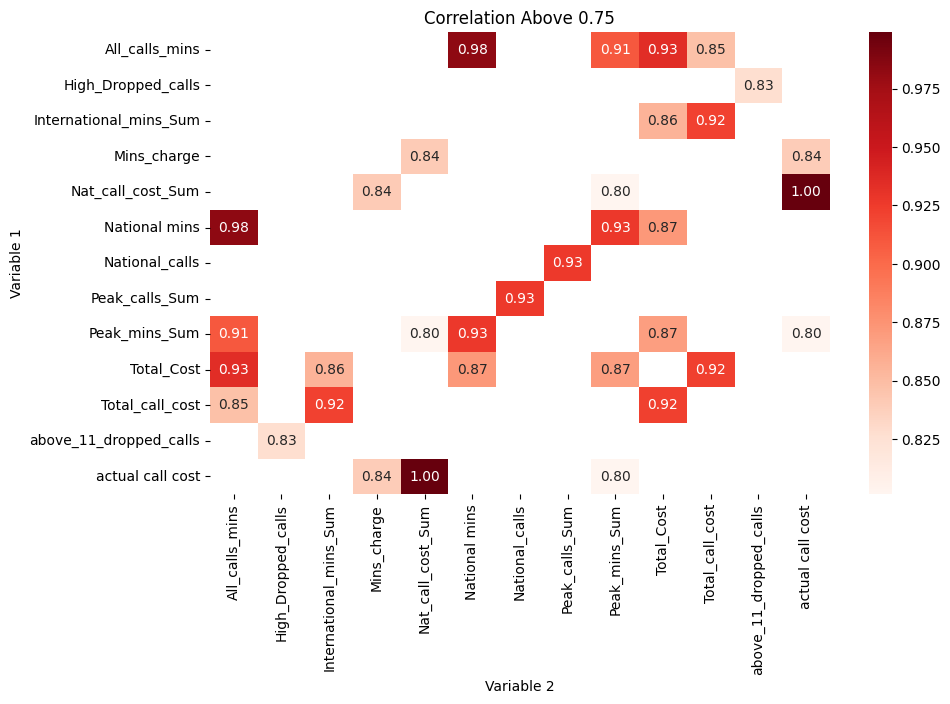

In [95]:
high_corr = corr[(corr > 0.80) & (corr < 1.0)]

# Remove NaN values and duplicate entries
high_corr = high_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').stack().reset_index()

# Rename columns
high_corr.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Plotting the high correlations using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(high_corr.pivot_table(index='Variable 1', columns='Variable 2', values='Correlation'), annot=True, cmap='Reds', fmt=".2f")
plt.title('Correlation Above 0.75')
plt.show()

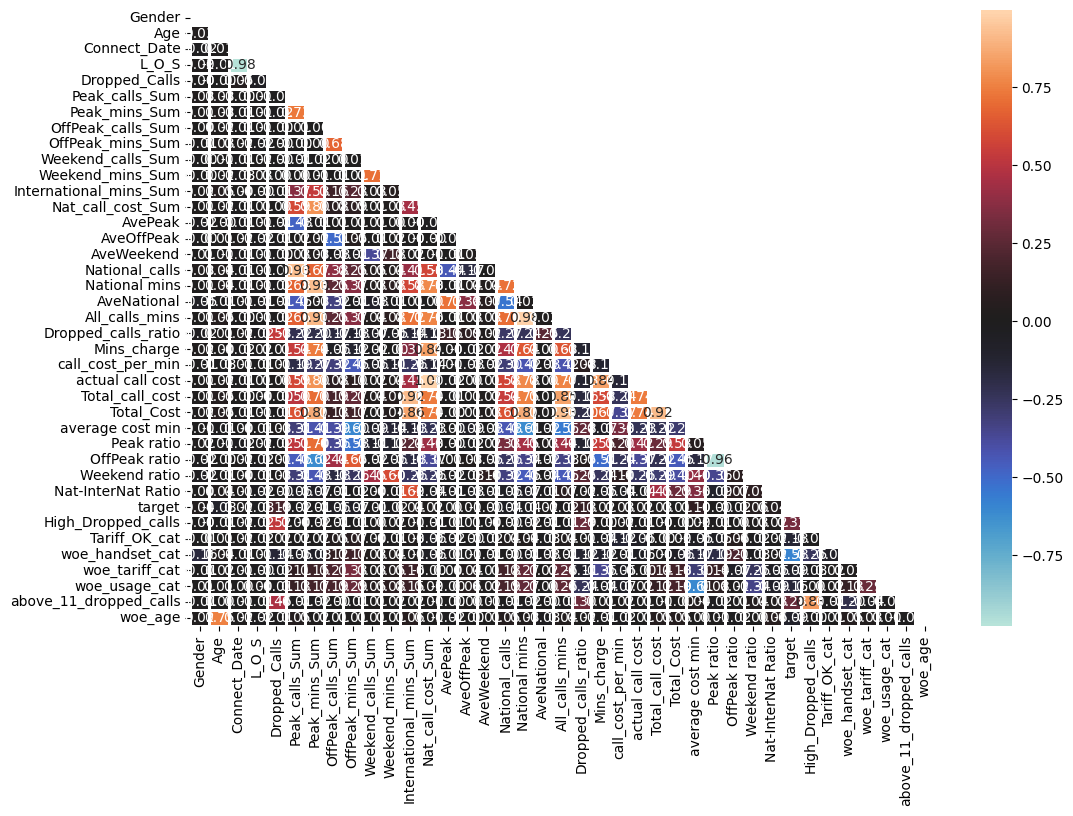

In [96]:
# Draw a heatmap of the correlation matrix
#plt.figure(12,8)

# Assuming 'corr' is your correlation matrix and 'threshold' is your correlation threshold
# Create a mask to hide the lower triangle of the correlation matrix
# Create a mask to hide the lower triangle of the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot the heatmap with the filtered correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr,  mask=mask, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

# KNN

<Axes: xlabel='Age', ylabel='Total_call_cost'>

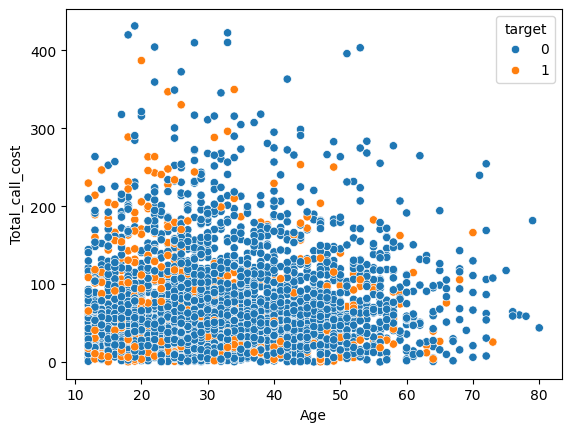

In [521]:
sns.scatterplot(x=train['Age'],y=train['Total_call_cost'], hue=train['target'])

### Processing TRAIN

In [522]:
train.drop("id",axis=1, inplace=True)
train.drop("Connect_Date", axis=1, inplace=True)

In [523]:
train.head()

,Gender,Age,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,target,High_Dropped_calls,Tariff_OK_cat,woe_handset_cat,woe_tariff_cat,woe_usage_cat,above_11_dropped_calls,woe_age
1115,0,20.0,34.166667,11.0,192.0,724.200001,5.0,78.300000,4.0,27.6,2.424408,31.579499,3.771875,14.382699,6.900000,201.0,830.100001,4.129851,832.524409,0.027363,230.100001,13.724250,31.579500,32.306822,137.306822,0.164928,0.872425,0.094326,0.033249,0.002921,0,0,1,2.191954,0.034227,0.262926,0,-0.283446
4207,0,48.0,14.266667,0.0,929.0,2027.400000,73.0,122.100000,26.0,46.0,568.476841,95.738942,2.182347,1.672603,1.769231,1028.0,2195.500000,2.135700,2763.976841,0.000000,995.500000,9.617171,95.738942,266.281994,416.281994,0.150610,0.923434,0.055614,0.020952,0.258928,0,0,1,0.087330,0.034227,0.021290,0,0.234690
202,0,28.0,57.200000,1.0,147.0,378.600000,0.0,0.000000,80.0,125.4,126.164805,0.000000,2.575510,0.000000,1.567500,227.0,504.000000,2.220264,630.164805,0.002203,-1296.000000,19.277381,0.000000,50.465922,128.405922,0.203766,0.751190,0.000000,0.248810,0.250327,0,0,1,2.191954,0.538037,0.262926,0,0.234690
2074,0,31.0,38.666667,4.0,796.0,1412.400000,68.0,194.400000,1.0,41.5,389.822673,41.622028,1.774372,2.858824,12.741109,865.0,1648.300000,1.905549,2038.122673,0.002312,448.300000,9.284414,41.622029,158.568831,308.568831,0.151399,0.856883,0.117940,0.025177,0.236500,0,0,1,2.191954,0.034227,0.021290,0,0.234690
4857,0,26.0,55.066667,0.0,546.0,1228.200000,42.0,66.600001,0.0,0.0,380.736197,9.614205,2.249451,1.585714,0.000000,588.0,1294.800001,2.202041,1675.536198,0.000000,94.800001,9.742817,9.236191,123.457050,273.457050,0.163206,0.948563,0.051437,0.000000,0.294050,0,0,1,0.087330,0.034227,0.021290,0,-0.283446


In [524]:
train.shape

(3528, 38)

In [525]:
vars_stand = train.iloc[:, list(range(1, 30))]
vars_stand.head()

,Age,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio
1115,20.0,34.166667,11.0,192.0,724.200001,5.0,78.300000,4.0,27.6,2.424408,31.579499,3.771875,14.382699,6.900000,201.0,830.100001,4.129851,832.524409,0.027363,230.100001,13.724250,31.579500,32.306822,137.306822,0.164928,0.872425,0.094326,0.033249,0.002921
4207,48.0,14.266667,0.0,929.0,2027.400000,73.0,122.100000,26.0,46.0,568.476841,95.738942,2.182347,1.672603,1.769231,1028.0,2195.500000,2.135700,2763.976841,0.000000,995.500000,9.617171,95.738942,266.281994,416.281994,0.150610,0.923434,0.055614,0.020952,0.258928
202,28.0,57.200000,1.0,147.0,378.600000,0.0,0.000000,80.0,125.4,126.164805,0.000000,2.575510,0.000000,1.567500,227.0,504.000000,2.220264,630.164805,0.002203,-1296.000000,19.277381,0.000000,50.465922,128.405922,0.203766,0.751190,0.000000,0.248810,0.250327
2074,31.0,38.666667,4.0,796.0,1412.400000,68.0,194.400000,1.0,41.5,389.822673,41.622028,1.774372,2.858824,12.741109,865.0,1648.300000,1.905549,2038.122673,0.002312,448.300000,9.284414,41.622029,158.568831,308.568831,0.151399,0.856883,0.117940,0.025177,0.236500
4857,26.0,55.066667,0.0,546.0,1228.200000,42.0,66.600001,0.0,0.0,380.736197,9.614205,2.249451,1.585714,0.000000,588.0,1294.800001,2.202041,1675.536198,0.000000,94.800001,9.742817,9.236191,123.457050,273.457050,0.163206,0.948563,0.051437,0.000000,0.294050


In [526]:
vars_nostand = train.iloc[:, [0] + list(range(30, 38))]
vars_nostand.head()

,Gender,target,High_Dropped_calls,Tariff_OK_cat,woe_handset_cat,woe_tariff_cat,woe_usage_cat,above_11_dropped_calls,woe_age
1115,0,0,0,1,2.191954,0.034227,0.262926,0,-0.283446
4207,0,0,0,1,0.087330,0.034227,0.021290,0,0.234690
202,0,0,0,1,2.191954,0.538037,0.262926,0,0.234690
2074,0,0,0,1,2.191954,0.034227,0.021290,0,0.234690
4857,0,0,0,1,0.087330,0.034227,0.021290,0,-0.283446


In [527]:
vars_nostand.shape

(3528, 9)

In [528]:
scaler = StandardScaler()
Standardized = scaler.fit_transform(vars_stand)

In [529]:
Standardized_df = pd.DataFrame(Standardized, columns=vars_stand.columns)

In [530]:
# Reset indexes of both DataFrames to merge based on the default integer indexes
Standardized_df_reset = Standardized_df.reset_index(drop=True)
vars_nostand_reset = vars_nostand.reset_index(drop=True)

# Merge DataFrames based on their index values
merged_df = pd.merge(Standardized_df_reset, vars_nostand_reset, left_index=True, right_index=True)

In [531]:
merged_df.isna().sum()

Age                       0
L_O_S                     0
Dropped_Calls             0
Peak_calls_Sum            0
Peak_mins_Sum             0
OffPeak_calls_Sum         0
OffPeak_mins_Sum          0
Weekend_calls_Sum         0
Weekend_mins_Sum          0
International_mins_Sum    0
Nat_call_cost_Sum         0
AvePeak                   0
AveOffPeak                0
AveWeekend                0
National_calls            0
National mins             0
AveNational               0
All_calls_mins            0
Dropped_calls_ratio       0
Mins_charge               0
call_cost_per_min         0
actual call cost          0
Total_call_cost           0
Total_Cost                0
average cost min          0
Peak ratio                0
OffPeak ratio             0
Weekend ratio             0
Nat-InterNat Ratio        0
Gender                    0
target                    0
High_Dropped_calls        0
Tariff_OK_cat             0
woe_handset_cat           0
woe_tariff_cat            0
woe_usage_cat       

### Processing TEST

In [532]:
test.drop("id",axis=1, inplace=True)
test.drop("Connect_Date", axis=1, inplace=True)

In [533]:
test.head()

,Gender,Age,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,target,woe_handset_cat,woe_tariff_cat,woe_usage_cat,High_Dropped_calls,Tariff_OK_cat,above_11_dropped_calls,woe_age
4636,0,61.0,51.233333,3.0,279.0,1125.000000,158.0,334.200001,9.0,15.600000,170.971561,24.221083,4.032258,2.115190,1.733333,446.0,1474.800001,3.306726,1645.771562,0.003363,274.800001,8.814076,24.221082,75.512551,225.512551,0.137025,0.762815,0.226607,0.010578,0.115929,0,0.087330,0.034227,0.021290,0,1,0,0.234690
1247,0,18.0,20.466667,2.0,20.0,1352.400000,40.0,245.400000,20.0,106.800001,202.761725,45.247043,15.075772,6.135000,5.340000,80.0,1704.600001,9.956815,1907.361726,0.012500,504.600001,8.966913,45.247043,106.075561,256.075561,0.134256,0.793383,0.143963,0.062654,0.118950,0,2.191954,0.034227,0.021290,0,1,0,-0.283446
8,1,23.0,50.900000,3.0,658.0,1516.200001,17.0,92.400000,54.0,88.200001,400.284283,47.036139,2.304255,5.435294,1.633333,729.0,1696.800002,2.327572,2097.084285,0.002058,496.800002,9.467822,47.036139,167.121424,317.121424,0.151220,0.893564,0.054455,0.051980,0.235905,1,0.087330,0.034227,0.021290,0,1,0,-0.283446
3211,0,42.0,14.533333,10.0,106.0,374.400000,55.0,245.400000,61.0,93.600000,169.897106,11.621354,3.532075,4.461818,1.534426,222.0,713.400000,3.213514,883.297106,0.022523,113.400000,10.248108,11.621354,62.590486,167.590486,0.189733,0.524811,0.343987,0.131203,0.238151,0,2.191954,0.034227,0.262926,0,1,0,0.234690
2579,0,59.0,31.200000,2.0,47.0,397.200000,309.0,810.600000,20.0,64.000000,121.180485,0.000000,8.451064,2.623301,3.200000,376.0,1271.800000,3.382447,1392.980485,0.002660,-528.200000,9.183205,0.000000,48.472194,126.412194,0.090749,0.312313,0.637364,0.050322,0.095283,0,2.191954,0.538037,0.021290,0,1,0,0.234690


In [534]:
test.shape

(1512, 38)

In [535]:
vars_stand_test = test.iloc[:, list(range(1, 30))]
vars_stand_test.head()

,Age,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio
4636,61.0,51.233333,3.0,279.0,1125.000000,158.0,334.200001,9.0,15.600000,170.971561,24.221083,4.032258,2.115190,1.733333,446.0,1474.800001,3.306726,1645.771562,0.003363,274.800001,8.814076,24.221082,75.512551,225.512551,0.137025,0.762815,0.226607,0.010578,0.115929
1247,18.0,20.466667,2.0,20.0,1352.400000,40.0,245.400000,20.0,106.800001,202.761725,45.247043,15.075772,6.135000,5.340000,80.0,1704.600001,9.956815,1907.361726,0.012500,504.600001,8.966913,45.247043,106.075561,256.075561,0.134256,0.793383,0.143963,0.062654,0.118950
8,23.0,50.900000,3.0,658.0,1516.200001,17.0,92.400000,54.0,88.200001,400.284283,47.036139,2.304255,5.435294,1.633333,729.0,1696.800002,2.327572,2097.084285,0.002058,496.800002,9.467822,47.036139,167.121424,317.121424,0.151220,0.893564,0.054455,0.051980,0.235905
3211,42.0,14.533333,10.0,106.0,374.400000,55.0,245.400000,61.0,93.600000,169.897106,11.621354,3.532075,4.461818,1.534426,222.0,713.400000,3.213514,883.297106,0.022523,113.400000,10.248108,11.621354,62.590486,167.590486,0.189733,0.524811,0.343987,0.131203,0.238151
2579,59.0,31.200000,2.0,47.0,397.200000,309.0,810.600000,20.0,64.000000,121.180485,0.000000,8.451064,2.623301,3.200000,376.0,1271.800000,3.382447,1392.980485,0.002660,-528.200000,9.183205,0.000000,48.472194,126.412194,0.090749,0.312313,0.637364,0.050322,0.095283


In [536]:
vars_nostand_test = test.iloc[:, [0] + list(range(30, 38))]
vars_nostand_test.head()

,Gender,target,woe_handset_cat,woe_tariff_cat,woe_usage_cat,High_Dropped_calls,Tariff_OK_cat,above_11_dropped_calls,woe_age
4636,0,0,0.087330,0.034227,0.021290,0,1,0,0.234690
1247,0,0,2.191954,0.034227,0.021290,0,1,0,-0.283446
8,1,1,0.087330,0.034227,0.021290,0,1,0,-0.283446
3211,0,0,2.191954,0.034227,0.262926,0,1,0,0.234690
2579,0,0,2.191954,0.538037,0.021290,0,1,0,0.234690


In [537]:
vars_nostand_test.shape

(1512, 9)

In [538]:
##################
scaler = StandardScaler()
Standardized_test = scaler.fit_transform(vars_stand_test)

In [539]:
Standardized_df_test = pd.DataFrame(Standardized_test, columns=vars_stand_test.columns)

In [540]:
# Reset indexes of both DataFrames to merge based on the default integer indexes
Standardized_df_reset = Standardized_df_test.reset_index(drop=True)
vars_nostand_reset = vars_nostand_test.reset_index(drop=True)

# Merge DataFrames based on their index values
merged_df_test = pd.merge(Standardized_df_reset, vars_nostand_reset, left_index=True, right_index=True)

In [541]:
merged_df_test.isna().sum()

Age                       0
L_O_S                     0
Dropped_Calls             0
Peak_calls_Sum            0
Peak_mins_Sum             0
OffPeak_calls_Sum         0
OffPeak_mins_Sum          0
Weekend_calls_Sum         0
Weekend_mins_Sum          0
International_mins_Sum    0
Nat_call_cost_Sum         0
AvePeak                   0
AveOffPeak                0
AveWeekend                0
National_calls            0
National mins             0
AveNational               0
All_calls_mins            0
Dropped_calls_ratio       0
Mins_charge               0
call_cost_per_min         0
actual call cost          0
Total_call_cost           0
Total_Cost                0
average cost min          0
Peak ratio                0
OffPeak ratio             0
Weekend ratio             0
Nat-InterNat Ratio        0
Gender                    0
target                    0
woe_handset_cat           0
woe_tariff_cat            0
woe_usage_cat             0
High_Dropped_calls        0
Tariff_OK_cat       

In [542]:
merged_df_test.shape

(1512, 38)

### Fitting a KNN

In [543]:
# Reorder the features in the test set to match the order of the training set
merged_df_test = merged_df_test[merged_df.columns.tolist()]

In [544]:
merged_df.head()

,Age,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,Gender,target,High_Dropped_calls,Tariff_OK_cat,woe_handset_cat,woe_tariff_cat,woe_usage_cat,above_11_dropped_calls,woe_age
0,-0.884637,0.037053,2.425415,-0.194387,0.037910,-1.011485,-1.168729,-0.755676,-0.605009,-1.176352,0.430672,-0.264151,2.343323,0.732354,-0.601526,-0.434760,0.143954,-0.632794,1.026816,0.340553,1.720226,0.435462,-0.685446,-0.591900,0.068315,1.176452,-1.123229,-0.433652,-1.502880,0,0,0,1,2.191954,0.034227,0.262926,0,-0.283446
1,1.281488,-1.382726,-0.775697,2.846226,2.607052,-0.314667,-0.951371,0.598886,-0.092519,2.799904,2.697246,-0.639170,-0.765060,-0.679289,2.545036,2.059412,-0.746408,2.381539,-0.387326,1.932879,-0.236254,2.703295,3.175522,2.775465,-0.267632,1.403616,-1.307317,-0.624349,0.900485,0,0,0,1,0.087330,0.034227,0.021290,0,0.234690
2,-0.265744,1.680381,-0.484687,-0.380042,-0.643409,-1.062722,-1.557293,3.923719,2.118985,-0.307133,-0.684944,-0.546411,-1.174113,-0.734792,-0.502601,-1.030446,-0.708651,-0.948608,-0.273493,-2.834321,4.365559,-0.680774,-0.385792,-0.699338,0.979582,0.636542,-1.571779,2.909171,0.819740,0,0,0,1,2.191954,0.538037,0.262926,0,0.234690
3,-0.033659,0.358108,0.388343,2.297513,1.394635,-0.365904,-0.592582,-0.940389,-0.217856,1.544941,0.785446,-0.735424,-0.474958,2.339436,1.924855,1.059844,-0.849167,1.248730,-0.267834,0.794493,-0.394768,0.790434,1.398081,1.475315,-0.249119,1.107237,-1.010936,-0.558829,0.689933,0,0,0,1,2.191954,0.034227,0.021290,0,0.234690
4,-0.420468,1.528177,-0.775697,1.266098,1.031501,-0.632334,-1.226790,-1.001960,-1.373743,1.481113,-0.345301,-0.623338,-0.786310,-1.166063,0.870928,0.414106,-0.716787,0.682857,-0.387326,0.059077,-0.176400,-0.354303,0.818680,1.051499,0.027912,1.515526,-1.327180,-0.949263,1.230206,0,0,0,1,0.087330,0.034227,0.021290,0,-0.283446


In [545]:
# split the training set into the target variable and other vars
y = merged_df["target"].values
x = merged_df.drop("target", axis=1)

In [546]:
# I train a knn model
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(x, y)

KNeighborsClassifier(n_neighbors=13)

In [547]:
X_test = merged_df_test.drop("target", axis=1)
Y_test = merged_df_test["target"].values

In [548]:
x.head()

,Age,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,Gender,High_Dropped_calls,Tariff_OK_cat,woe_handset_cat,woe_tariff_cat,woe_usage_cat,above_11_dropped_calls,woe_age
0,-0.884637,0.037053,2.425415,-0.194387,0.037910,-1.011485,-1.168729,-0.755676,-0.605009,-1.176352,0.430672,-0.264151,2.343323,0.732354,-0.601526,-0.434760,0.143954,-0.632794,1.026816,0.340553,1.720226,0.435462,-0.685446,-0.591900,0.068315,1.176452,-1.123229,-0.433652,-1.502880,0,0,1,2.191954,0.034227,0.262926,0,-0.283446
1,1.281488,-1.382726,-0.775697,2.846226,2.607052,-0.314667,-0.951371,0.598886,-0.092519,2.799904,2.697246,-0.639170,-0.765060,-0.679289,2.545036,2.059412,-0.746408,2.381539,-0.387326,1.932879,-0.236254,2.703295,3.175522,2.775465,-0.267632,1.403616,-1.307317,-0.624349,0.900485,0,0,1,0.087330,0.034227,0.021290,0,0.234690
2,-0.265744,1.680381,-0.484687,-0.380042,-0.643409,-1.062722,-1.557293,3.923719,2.118985,-0.307133,-0.684944,-0.546411,-1.174113,-0.734792,-0.502601,-1.030446,-0.708651,-0.948608,-0.273493,-2.834321,4.365559,-0.680774,-0.385792,-0.699338,0.979582,0.636542,-1.571779,2.909171,0.819740,0,0,1,2.191954,0.538037,0.262926,0,0.234690
3,-0.033659,0.358108,0.388343,2.297513,1.394635,-0.365904,-0.592582,-0.940389,-0.217856,1.544941,0.785446,-0.735424,-0.474958,2.339436,1.924855,1.059844,-0.849167,1.248730,-0.267834,0.794493,-0.394768,0.790434,1.398081,1.475315,-0.249119,1.107237,-1.010936,-0.558829,0.689933,0,0,1,2.191954,0.034227,0.021290,0,0.234690
4,-0.420468,1.528177,-0.775697,1.266098,1.031501,-0.632334,-1.226790,-1.001960,-1.373743,1.481113,-0.345301,-0.623338,-0.786310,-1.166063,0.870928,0.414106,-0.716787,0.682857,-0.387326,0.059077,-0.176400,-0.354303,0.818680,1.051499,0.027912,1.515526,-1.327180,-0.949263,1.230206,0,0,1,0.087330,0.034227,0.021290,0,-0.283446


In [549]:
X_test.head()

,Age,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,Gender,High_Dropped_calls,Tariff_OK_cat,woe_handset_cat,woe_tariff_cat,woe_usage_cat,above_11_dropped_calls,woe_age
0,2.399758,1.253308,0.086872,0.167928,0.819848,0.535954,0.125487,-0.481505,-1.008821,-0.005466,0.166075,-0.201100,-0.649962,-0.708762,0.333391,0.738956,-0.208516,0.629039,-0.191364,0.426037,-0.580444,0.172600,0.021021,0.446952,-0.602703,0.669904,-0.459725,-0.836623,-0.476468,0,0,1,0.087330,0.034227,0.021290,0,0.234690
1,-1.070728,-0.929217,-0.206320,-0.943742,1.279020,-0.662417,-0.334979,0.178002,1.506350,0.218691,0.919994,2.391036,0.331119,0.293149,-1.121543,1.170345,2.814791,1.047885,0.249555,0.917039,-0.508308,0.927135,0.532167,0.822535,-0.671412,0.808885,-0.856595,0.007584,-0.445766,0,0,1,2.191954,0.034227,0.021290,0,-0.283446
2,-0.667184,1.229662,0.086872,1.794658,1.609770,-0.895997,-1.128349,2.216480,0.993388,1.611455,0.984144,-0.606697,0.160348,-0.736541,1.458381,1.155703,-0.653665,1.351661,-0.254370,0.900373,-0.271886,0.991338,1.553120,1.572717,-0.250474,1.264370,-1.286428,-0.165453,0.742828,1,0,1,0.087330,0.034227,0.021290,0,-0.283446
3,0.866287,-1.350116,2.139216,-0.574616,-0.695785,-0.510081,-0.334979,2.636166,1.142312,-0.013042,-0.285708,-0.318503,-0.077240,-0.764017,-0.557061,-0.690371,-0.250892,-0.591802,0.733220,0.081181,0.096397,-0.279551,-0.195092,-0.264842,0.705173,-0.412211,0.103954,1.118837,0.765654,0,0,1,2.191954,0.034227,0.262926,0,0.234690
4,2.238340,-0.167816,-0.206320,-0.827854,-0.649746,2.069463,2.595824,0.178002,0.325985,-0.356551,-0.702410,0.836083,-0.525951,-0.301330,0.055125,0.357877,-0.174091,0.224281,-0.225321,-1.289694,-0.406221,-0.696594,-0.431212,-0.770875,-1.750978,-1.378360,1.512800,-0.192331,-0.686290,0,0,1,2.191954,0.538037,0.021290,0,0.234690


In [550]:
y_pred = knn.predict(X_test)

In [551]:
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1261   28]
 [ 114  109]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1289
           1       0.80      0.49      0.61       223

    accuracy                           0.91      1512
   macro avg       0.86      0.73      0.78      1512
weighted avg       0.90      0.91      0.90      1512



In [552]:
def profit_metric(actual_target,prob_array,predict_array):
    profit_table = test_ID.reset_index(drop=True)
    profit_table.loc[:,"Prob_1"] = pd.Series(prob_array, index=profit_table.index)
    profit_table.loc[:,"target"]= actual_target.reset_index(drop=True)
    profit_table.loc[:,"Pred_1"] = pd.Series(predict_array, index=profit_table.index)
    profit_table_sorted = profit_table.sort_values("Prob_1", ascending=False)
    top_k_table = profit_table_sorted.head(20)
    profit_at_top_20 = top_k_table[(top_k_table["target"] == 1) & (top_k_table['Pred_1'] ==1)]['average cost min'].sum()  

    return profit_at_top_20

In [553]:
sum(knn.predict_proba(X_test)[:,1] > 0.5)

137

In [554]:
sum(knn.predict(X_test)==1)

137

In [555]:
test_ID.index

Index([4636, 1247,    8, 3211, 2579, 1147,  309, 3679, 3441, 4425,
       ...
       4921, 2759, 4387, 3196, 4521, 1150, 4617, 4464, 1560, 4429],
      dtype='int64', length=1512)

In [381]:
profit_metric(y_test, knn.predict_proba(X_test)[:,1], knn.predict(X_test))

2.560294

### Cross validation

In [556]:
X_train.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Usage_Band,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,high Dropped calls,No Usage,id
1115,F,20.0,22/12/97,34.166667,11.0,CAT 100,WC95,192.0,724.200001,5.0,78.300000,4.0,27.6,2.424408,31.579499,3.771875,15.660000,6.900000,201.0,830.100001,4.129851,832.524409,0.027363,Med,230.100001,13.724250,31.579500,32.306822,137.306822,OK,0.164928,0.872425,0.094326,0.033249,0.002921,F,F,K301840
4207,F,48.0,11/08/99,14.266667,0.0,CAT 200,S50,929.0,2027.400000,73.0,122.100000,26.0,46.0,568.476841,95.738942,2.182347,1.672603,1.769231,1028.0,2195.500000,2.135700,2763.976841,0.000000,High,995.500000,9.617171,95.738942,266.281994,416.281994,OK,0.150610,0.923434,0.055614,0.020952,0.258928,F,F,K116920
202,F,28.0,31/01/96,57.200000,1.0,Play 300,BS210,147.0,378.600000,0.0,0.000000,80.0,125.4,126.164805,0.000000,2.575510,0.000000,1.567500,227.0,504.000000,2.220264,630.164805,0.002203,Med,-1296.000000,19.277381,0.000000,50.465922,128.405922,OK,0.203766,0.751190,0.000000,0.248810,0.250327,F,F,K276340
2074,F,31.0,09/08/97,38.666667,4.0,CAT 200,ASAD170,796.0,1412.400000,68.0,194.400000,1.0,41.5,389.822673,41.622028,1.774372,2.858824,41.500000,865.0,1648.300000,1.905549,2038.122673,0.002312,MedHigh,448.300000,9.284414,41.622029,158.568831,308.568831,OK,0.151399,0.856883,0.117940,0.025177,0.236500,F,F,K116850
4857,F,26.0,04/04/96,55.066667,0.0,CAT 200,S50,546.0,1228.200000,42.0,66.600001,0.0,0.0,380.736197,9.614205,2.249451,1.585714,0.000000,588.0,1294.800001,2.202041,1675.536198,0.000000,MedHigh,94.800001,9.742817,9.236191,123.457050,273.457050,OK,0.163206,0.948563,0.051437,0.000000,0.294050,F,F,K115360


In [389]:
param_grid = {'n_neighbors': range(1, 21)}  # Example: Search from k=1 to k=20
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

ValueError: 
All the 100 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\bryce\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\bryce\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\bryce\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py", line 238, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "c:\Users\bryce\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_base.py", line 476, in _fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\bryce\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\bryce\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1263, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\bryce\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\bryce\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\bryce\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\generic.py", line 2150, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'F'


In [383]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

ValueError: could not convert string to float: 'F'

## Split train and test set into x_train, y_train, x_test, y_test
- Drop Connect Date, id, woe_age

In [ ]:
y_train_l1 = train["target"]
X_train_l1 = train.drop(["target","Connect_Date","id","woe_age"],axis=1)

y_test_l1 = test["target"]
X_test_l1 = test.drop(["target","Connect_Date","id","woe_age"],axis=1)

# Reorder the features in the test set to match the order of the training set
X_test_l1 = X_test_l1[X_train_l1.columns.tolist()]

## Standardize variables except dummies and woe columns 

In [ ]:
scaler = StandardScaler()
X_train_l1.iloc[:,1:30] = scaler.fit_transform(X_train_l1.iloc[:,1:30])
X_test_l1.iloc[:,1:30] = scaler.transform(X_test_l1.iloc[:,1:30])

In [ ]:
X_train_l1.head()

,Gender,Age,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,High_Dropped_calls,Tariff_OK_cat,woe_handset_cat,woe_tariff_cat,woe_usage_cat,above_11_dropped_calls
1115,0,-0.884637,0.037053,2.425415,-0.194387,0.037910,-1.011485,-1.168729,-0.755676,-0.605009,-1.176352,0.430672,-0.264151,2.343323,0.732354,-0.601526,-0.434760,0.143954,-0.632794,1.026816,0.340553,1.720226,0.435462,-0.685446,-0.591900,0.068315,1.176452,-1.123229,-0.433652,-1.502880,0,1,2.191954,0.034227,0.262926,0
4207,0,1.281488,-1.382726,-0.775697,2.846226,2.607052,-0.314667,-0.951371,0.598886,-0.092519,2.799904,2.697246,-0.639170,-0.765060,-0.679289,2.545036,2.059412,-0.746408,2.381539,-0.387326,1.932879,-0.236254,2.703295,3.175522,2.775465,-0.267632,1.403616,-1.307317,-0.624349,0.900485,0,1,0.087330,0.034227,0.021290,0
202,0,-0.265744,1.680381,-0.484687,-0.380042,-0.643409,-1.062722,-1.557293,3.923719,2.118985,-0.307133,-0.684944,-0.546411,-1.174113,-0.734792,-0.502601,-1.030446,-0.708651,-0.948608,-0.273493,-2.834321,4.365559,-0.680774,-0.385792,-0.699338,0.979582,0.636542,-1.571779,2.909171,0.819740,0,1,2.191954,0.538037,0.262926,0
2074,0,-0.033659,0.358108,0.388343,2.297513,1.394635,-0.365904,-0.592582,-0.940389,-0.217856,1.544941,0.785446,-0.735424,-0.474958,2.339436,1.924855,1.059844,-0.849167,1.248730,-0.267834,0.794493,-0.394768,0.790434,1.398081,1.475315,-0.249119,1.107237,-1.010936,-0.558829,0.689933,0,1,2.191954,0.034227,0.021290,0
4857,0,-0.420468,1.528177,-0.775697,1.266098,1.031501,-0.632334,-1.226790,-1.001960,-1.373743,1.481113,-0.345301,-0.623338,-0.786310,-1.166063,0.870928,0.414106,-0.716787,0.682857,-0.387326,0.059077,-0.176400,-0.354303,0.818680,1.051499,0.027912,1.515526,-1.327180,-0.949263,1.230206,0,1,0.087330,0.034227,0.021290,0


In [ ]:
X_test_l1.head()

,Gender,Age,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,High_Dropped_calls,Tariff_OK_cat,woe_handset_cat,woe_tariff_cat,woe_usage_cat,above_11_dropped_calls
4636,0,2.287190,1.254685,0.097333,0.164546,0.828052,0.556356,0.101177,-0.447821,-0.939241,0.007614,0.170719,-0.202719,-0.656821,-0.689166,0.330648,0.742912,-0.223560,0.636405,-0.213513,0.433546,-0.618822,0.175365,0.027518,0.472786,-0.586380,0.688313,-0.494190,-0.785224,-0.441974,0,1,0.087330,0.034227,0.021290,0
1247,0,-1.039361,-0.940383,-0.193677,-0.904001,1.276350,-0.652829,-0.339494,0.229460,1.600925,0.230925,0.913508,2.402786,0.326264,0.303147,-1.061905,1.162687,2.745614,1.044657,0.258680,0.911619,-0.546016,0.918566,0.531857,0.841696,-0.651350,0.824445,-0.887189,0.022347,-0.413613,0,1,2.191954,0.034227,0.021290,0
8,1,-0.652552,1.230904,0.097333,1.728172,1.599267,-0.888517,-1.098757,2.322874,1.082865,1.618429,0.976712,-0.610408,0.155144,-0.716679,1.407404,1.148438,-0.660739,1.340749,-0.280988,0.895392,-0.307399,0.981805,1.539212,1.578549,-0.253319,1.270592,-1.312828,-0.143180,0.684348,0,1,0.087330,0.034227,0.021290,0
3211,0,0.817319,-1.363701,2.134404,-0.549194,-0.651689,-0.499119,-0.339494,2.753870,1.233269,0.000066,-0.274394,-0.320728,-0.082929,-0.743892,-0.521625,-0.647936,-0.265178,-0.553555,0.776649,0.097772,0.064304,-0.269995,-0.185717,-0.226362,0.650322,-0.371617,0.063990,1.085375,0.705433,0,1,2.191954,0.034227,0.262926,0
2579,0,2.132466,-0.174606,-0.193677,-0.792608,-0.606741,2.103704,2.465315,0.229460,0.408829,-0.342146,-0.684944,0.839814,-0.532558,-0.285637,0.064313,0.372092,-0.189752,0.241885,-0.249878,-1.237002,-0.442981,-0.680774,-0.418691,-0.723403,-1.672167,-1.317959,1.459092,-0.168892,-0.635796,0,1,2.191954,0.538037,0.021290,0
